<a href="https://colab.research.google.com/github/GAKIZAB/Projet-Machine-learning/blob/main/Pr%C3%A9diction%20et%20selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Chargement et préparation de données réelles**

In [16]:
# importattion des données
import pandas as pd

data = pd.read_csv('OnlineNewsPopularity.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [17]:
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [18]:
# Suppression des espaces devant 'shares' et dans le nom de la colonne cible si nécessaire
data.columns = data.columns.str.strip()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

In [20]:
# Desciption des données
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


In [21]:
data.drop(['url', 'timedelta'], axis=1, inplace=True)

In [22]:
# Description de la variable cible
data['shares'].describe()

,shares
count,39644.000000
mean,3395.380184
std,11626.950749
min,1.000000
25%,946.000000
50%,1400.000000
75%,2800.000000
max,843300.000000


Text(0.5, 1.0, 'Boxplot de la variable cible')

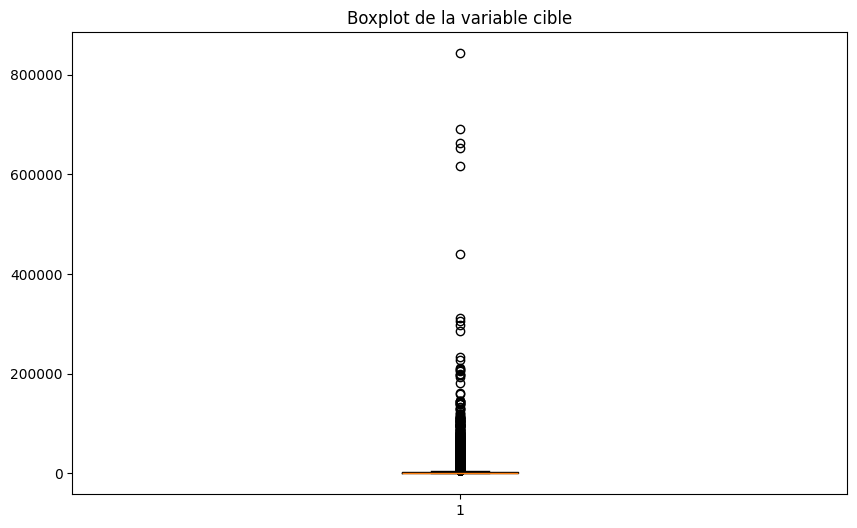

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(data['shares'])
plt.title('Boxplot de la variable cible')

In [25]:
# Suppression des valeurs aberrantes
Q1 = data['shares'].quantile(0.25)
Q3 = data['shares'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Limite inférieure : {lower_bound}")
print(f"Limite supérieure : {upper_bound}")

data = data[(data['shares'] <= upper_bound)]
data['shares'].describe()

Limite inférieure : -1835.0
Limite supérieure : 5581.0


,shares
count,35103.000000
mean,1671.972652
std,1103.199563
min,1.000000
25%,903.000000
50%,1300.000000
75%,2100.000000
max,5500.000000


In [26]:
data['shares'].describe()

,shares
count,35103.000000
mean,1671.972652
std,1103.199563
min,1.000000
25%,903.000000
50%,1300.000000
75%,2100.000000
max,5500.000000


In [27]:
# Lien entre la variable cible et les autres variables
correlations = data.corr()['shares'].sort_values(ascending=False)[1:]
correlations

,shares
kw_avg_avg,0.147678
is_weekend,0.139997
data_channel_is_socmed,0.114944
weekday_is_saturday,0.101764
data_channel_is_tech,0.097379
weekday_is_sunday,0.089757
kw_min_avg,0.089510
LDA_04,0.086734
num_hrefs,0.077652
LDA_00,0.075626


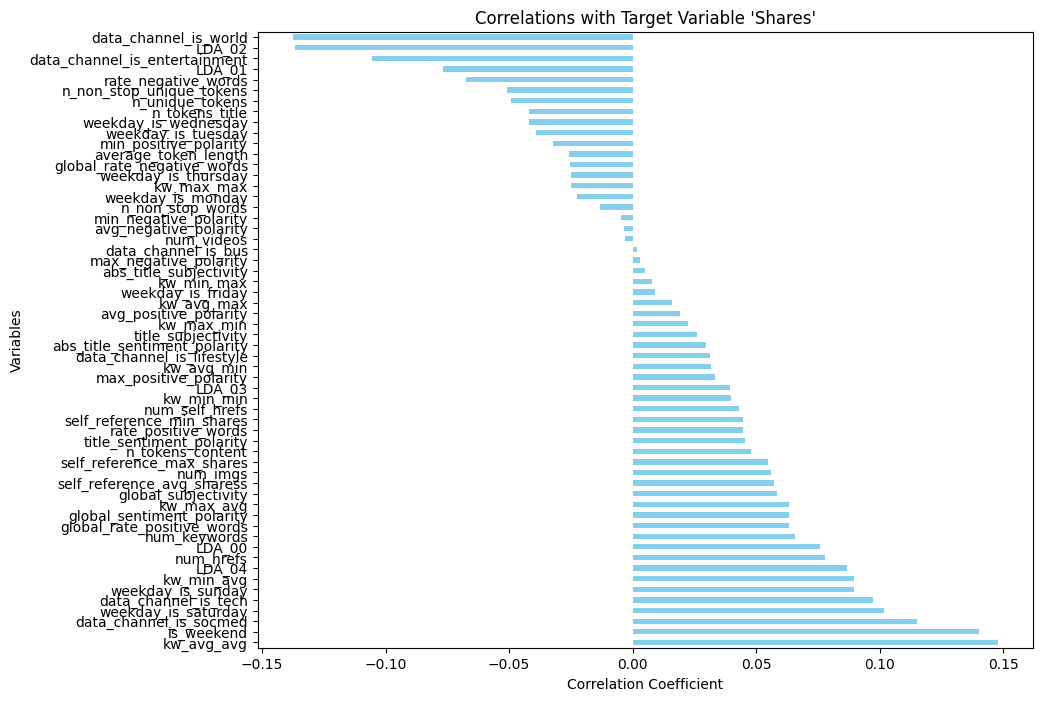

In [28]:
import matplotlib.pyplot as plt

# Créer un graphique en barres horizontales
plt.figure(figsize=(10, 8))
correlations.plot(kind='barh', color='skyblue')
plt.title("Correlations with Target Variable 'Shares'")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Variables")
plt.show()


# 2.   **Prédiction**



## a. Random Forest sans diminution de dimension

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

In [30]:
X = data.drop('shares', axis=1)
y = data['shares']

# Séparation en données d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Prédiction
y_pred_rf = random_forest.predict(X_test_scaled)

In [33]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (MSE) :", mse_rf)
print("Coefficient de Détermination (R²) :", r2_rf)

Mean Squared Error (MSE) : 1061564.3333567725
Coefficient de Détermination (R²) : 0.11670702563063562


In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# Optimisation des hyperparamètres avec GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],  # Nombre d'arbres
    'max_depth': [10, 20, None],      # Profondeur maximale des arbres
      # Nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]     # Nombre minimum d'échantillons pour un nœud feuille
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='neg_mean_squared_error',  # Minimise MSE
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train_scaled, y_train)

# Meilleurs paramètres
best_params = grid_search.best_params_
print("Meilleurs paramètres:", best_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Meilleurs paramètres: {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 100}


In [35]:
# Entraîner le modèle avec les meilleurs paramètres
optimized_rf = RandomForestRegressor(**best_params, random_state=42)
optimized_rf.fit(X_train_scaled, y_train)

# Prédiction
y_pred_optimized_rf = optimized_rf.predict(X_test_scaled)

# Calcul du MSE et du R²
mse = mean_squared_error(y_test, y_pred_optimized_rf)
r2 = r2_score(y_test, y_pred_optimized_rf)


# Affichage des performances
print("\nPerformance sur l'ensemble de test:")
print("Mean Squared Error (MSE) :", mse)
print("Coefficient de Détermination (R²) :", r2)


Performance sur l'ensemble de test:
Mean Squared Error (MSE) : 1041684.7842182113
Coefficient de Détermination (R²) : 0.13324814851500844


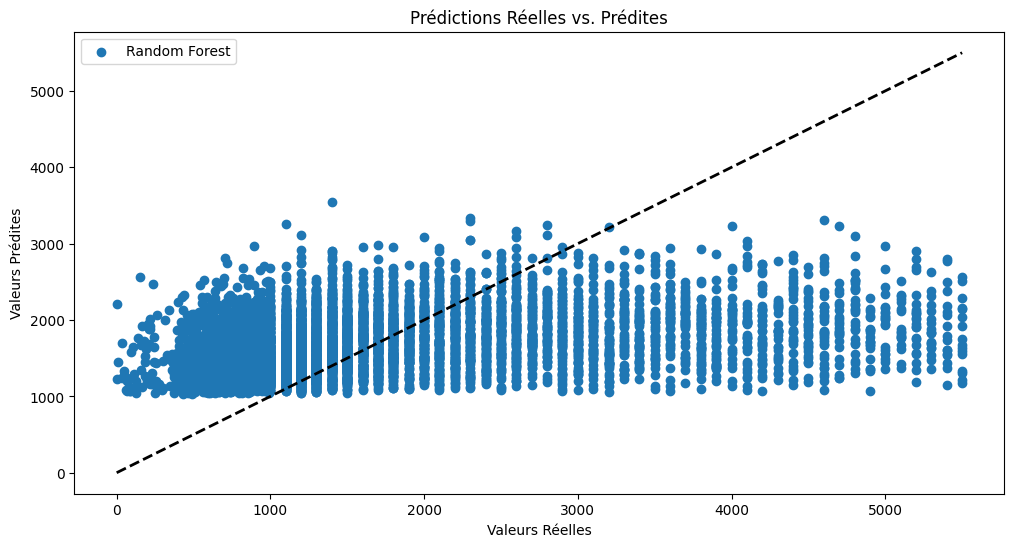

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Exemple pour le Random Forest sans réduction de dimension
plt.scatter(y_test, y_pred_optimized_rf, label="Random Forest")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.title("Prédictions Réelles vs. Prédites")
plt.legend()
plt.show()

## b. Random Forest + ACP